# Discussion Practice #3 

## Libraries

In [20]:
import pandas as pd 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#downloading data
df_clean = pd.read_csv("ISSP_USONLY_CLEAN.csv")


## Creating the model

In [13]:
rng = np.random.default_rng(140)

model = smf.ols(
    "Political_participation ~ Trust_in_Government + Political_Spectrum + Income_Above_50K",
    data=df_clean
).fit()

B = 100
coef_rows = []

for b in range(B):
    bootstrap = df_clean.sample(n=len(df_clean), replace=True)
    model = smf.ols("Political_participation ~ Trust_in_Government + Political_Spectrum + Income_Above_50K",
    data=bootstrap).fit()
    coef_rows.append(model.params.reindex(['Intercept','Trust_in_Government','Political_Spectrum','Income_Above_50K']))

bootstrap_sample_coefs = pd.DataFrame(coef_rows)

bootstrap_summary = pd.DataFrame({'mean': bootstrap_sample_coefs.mean(), 'std': bootstrap_sample_coefs.std(ddof=1)})
print(bootstrap_summary)
print(bootstrap_sample_coefs)

                         mean       std
Intercept            3.832565  0.249573
Trust_in_Government -0.185448  0.066507
Political_Spectrum  -0.087418  0.032153
Income_Above_50K     1.195882  0.125186
    Intercept  Trust_in_Government  Political_Spectrum  Income_Above_50K
0    3.714051            -0.142554           -0.082783          1.174262
1    3.872039            -0.209420           -0.071773          1.071185
2    3.673204            -0.155352           -0.082940          1.327557
3    3.504761            -0.162971           -0.031046          1.180339
4    3.952924            -0.216628           -0.114139          1.365596
..        ...                  ...                 ...               ...
95   3.759579            -0.220870           -0.065734          1.065701
96   3.517648            -0.148056           -0.058717          1.263208
97   3.901278            -0.152392           -0.112470          1.311166
98   3.562386            -0.148730           -0.074634          1.2477

## Visualizing distributions

Intercept: mean=3.81, SE=0.28, 95% CI=(3.32, 4.32)


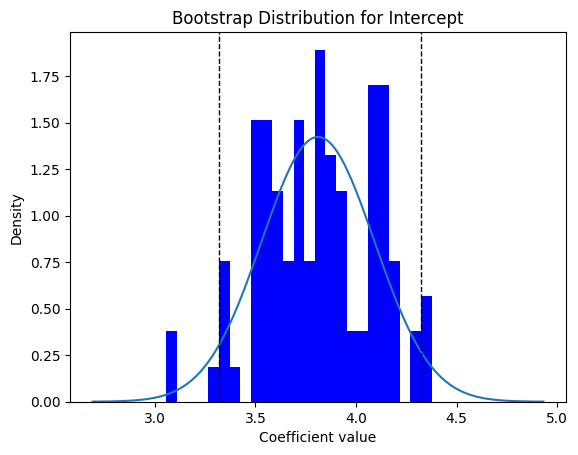

Trust_in_Government: mean=-0.18, SE=0.06, 95% CI=(-0.29, -0.07)


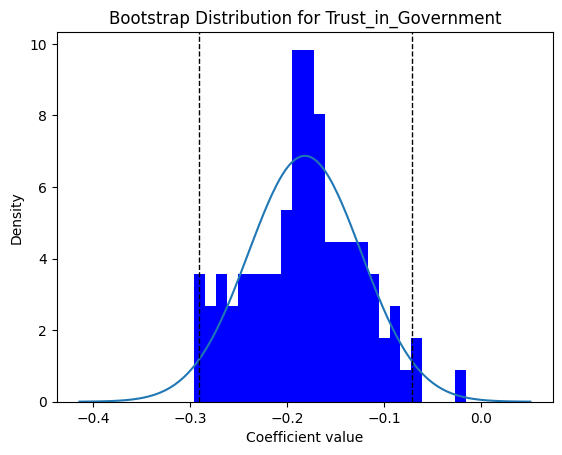

Political_Spectrum: mean=-0.09, SE=0.04, 95% CI=(-0.16, -0.01)


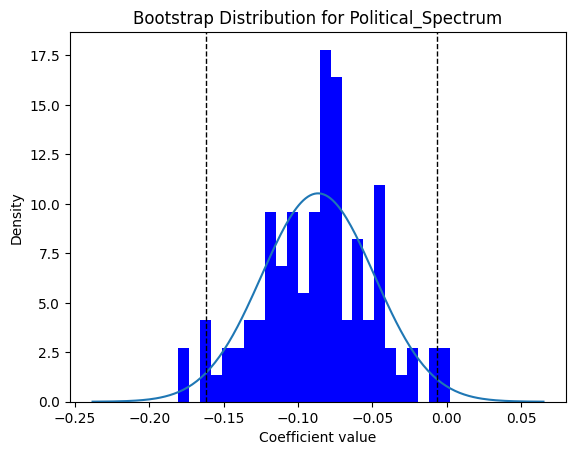

Income_Above_50K: mean=1.22, SE=0.16, 95% CI=(0.95, 1.56)


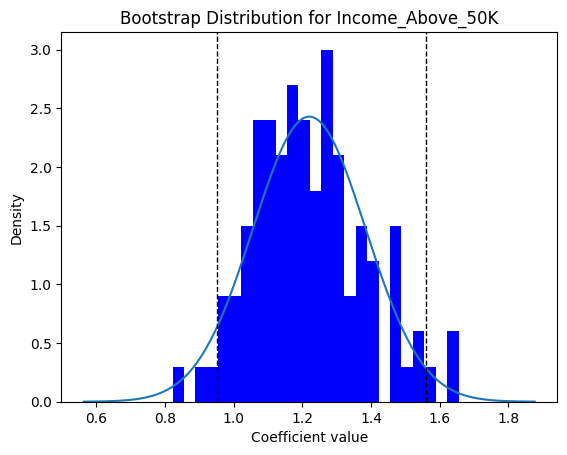

In [4]:
for coef in bootstrap_sample_coefs.columns:
    samples = bootstrap_sample_coefs[coef].values
    mean_est = samples.mean()
    std_est = samples.std(ddof=1)
    ci = np.percentile(samples, [2.5, 97.5])

    print(f"{coef}: mean={mean_est:.2f}, SE={std_est:.2f}, 95% CI=({ci[0]:.2f}, {ci[1]:.2f})")

    fig, ax = plt.subplots()
    ax.hist(samples, bins=25, density=True, color='blue')

    x = np.linspace(mean_est - 4*std_est, mean_est + 4*std_est, 200)
    pdf = norm.pdf(x, loc=mean_est, scale=std_est)
    ax.plot(x, pdf)

    ax.axvline(ci[0], color='k', linestyle='--', linewidth=1)
    ax.axvline(ci[1], color='k', linestyle='--', linewidth=1)

    ax.set_title("Bootstrap Distribution for " + coef)
    ax.set_xlabel('Coefficient value')
    ax.set_ylabel('Density')
    plt.show()


 # Discussion Practice #2.

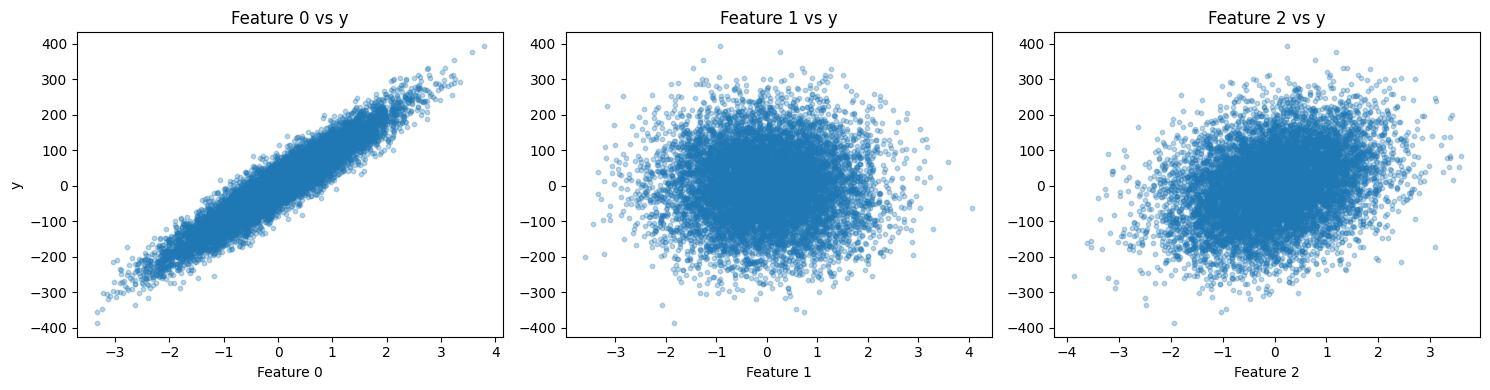

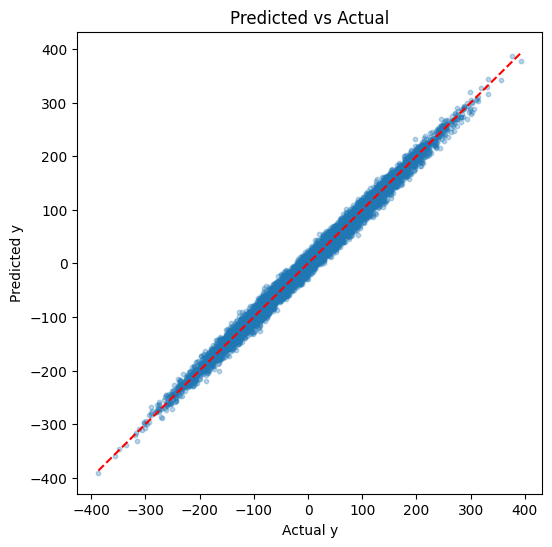

[97.62283756  0.         33.08611413]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X,y, coef = make_regression(n_samples=10000, n_features=3, n_informative =2, noise =10, coef=True, random_state=140)

fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, ax in enumerate(axes):
    ax.scatter(X[:, i], y, alpha=0.3, s=10)
    ax.set_xlabel(f"Feature {i}")
    ax.set_ylabel("y" if i==0 else "")
    ax.set_title(f"Feature {i} vs y")
plt.tight_layout()
plt.show()

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.3, s=10)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual")
plt.show()
print(coef)